<a href="https://colab.research.google.com/github/kdm1258/self_studying_ML_DL/blob/main/8_3_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 훈련 된 합성곱 신경망

In [39]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# reshape() 메서드를 활용해 깊이층을 추가함
# Conv2D 층은 깊이를 포함한 3차원을 기대하기 때문(rgb)
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [27]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
print(train_scaled.shape)
print(train_target.shape)


(48000, 28, 28, 1)
(48000,)


In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7443 - loss: 0.7175

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7443 - loss: 0.7173 - val_accuracy: 0.8822 - val_loss: 0.3241
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8725 - loss: 0.3559

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8725 - loss: 0.3559 - val_accuracy: 0.8946 - val_loss: 0.2959
Epoch 3/20
1486/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8916 - loss: 0.2977

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8916 - loss: 0.2976 - val_accuracy: 0.9057 - val_loss: 0.2537
Epoch 4/20
1492/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9070 - loss: 0.2565

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9070 - loss: 0.2565 - val_accuracy: 0.9117 - val_loss: 0.2342
Epoch 5/20
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9135 - loss: 0.2420

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9135 - loss: 0.2419 - val_accuracy: 0.9134 - val_loss: 0.2296
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9198 - loss: 0.2164 - val_accuracy: 0.9135 - val_loss: 0.2411
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9268 - loss: 0.1994 - val_accuracy: 0.9175 - val_loss: 0.2304


In [42]:
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [43]:
# 0번째 층의 가중치(weights[0])와 절편(weights[1])
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


weights[0] = 커널의 크기(3,3) + 깊이 (1) + 필터의 개수(32)

weights[1] = 필터마다 하나의 절편 존재(32)

In [54]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.019444698 0.22706015


가중치의 평균값은 0에 가깝고 표준편차는 0.30정도이다.

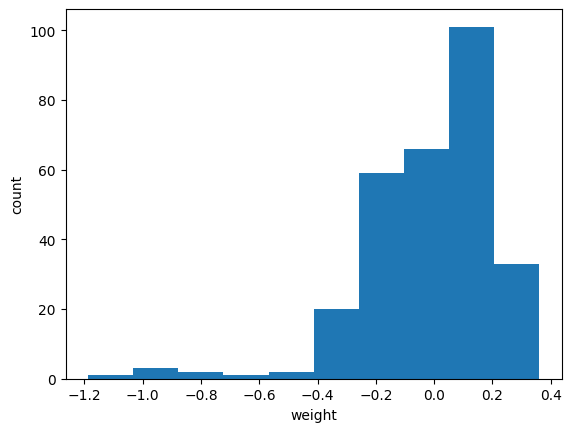

In [55]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

각 가중치의 빈도수를 histogram으로 표현

0을 중심으로 종모양 형태를 가진다

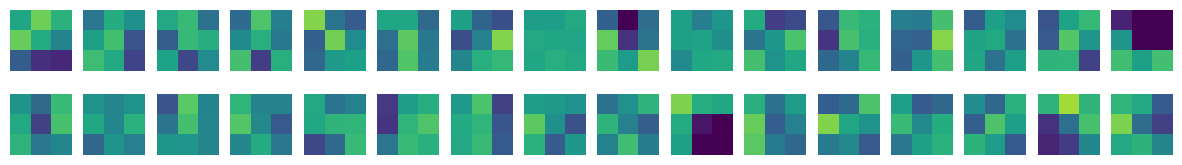

In [56]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:, :, 0, i*16 + j], vmin =-0.5, vmax = 0.5)
    axs[i,j].axis('off')

plt.show()

conv_weights에는 32개의 가중치가 저장되어 있다.([3,3,1] * 32)
이 배열의 마지막 차원을 순회하면서 0부터 i*16+j번째까지의 가중치 값을 차례대로 출력한다.

imshow() 메서드는 배열에 있는 최대값과 최솟값을 사용해 픽셀의 강도를 표현한다. 즉 0.1이나 0.4나 어떤 값이든 그 배열의 최댓값이면 가장 밝은 노란색으로 그림을 그린다. 따라서 어떤 절댓값 범위를 주어 강도를 나타내는것이 바람직하다. 위의 코드에서 vmin과 vmax로 컬러맵의 범위를 지정하였다.

높은 값일수록 밝은 색을 띈다.



# 훈련하지 않은 빈 합성곱 신경망

In [27]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, padding = 'same', activation= 'relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [29]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0017864002 0.083515614


평균은 훈련된 모델과 비슷한 0에 가까운 값을 보이지만, 표준편차는 훈련된 모델에 비해 매우 작다.

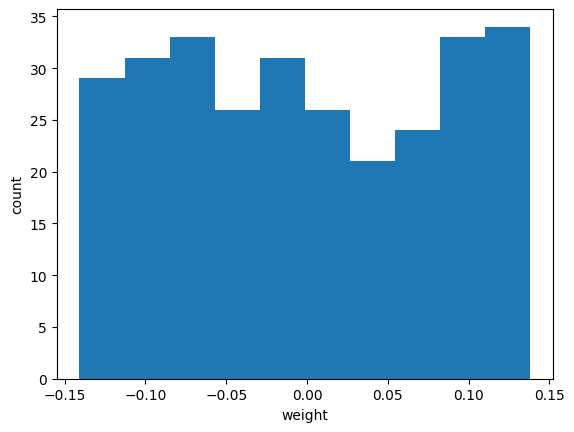

In [30]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

가중치가 -0.15 ~ 0.15에 분포하고 비교적 고른 분포를 보인다.

이러한 이유는 텐서플로가 신경망의 가중치를 처음으로 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문이다.

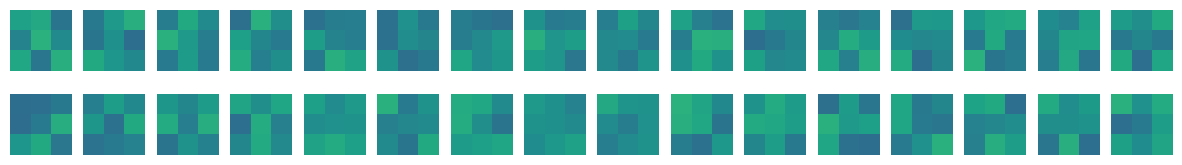

In [33]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax = 0.5)
    axs[i,j].axis('off')

plt.show()

전체적으로 가중치가 밋밋하게 초기화 되었다.

# 함수형 API

입력이 두개이거나 출력이 2개인 복잡한 모델을 만들 때에는 Sequential()을 사용하기 어렵다.

따라서 **함수형API**를 사용해 모델을 만든다.


신경망 모델을 만들 때 함수형 API를 사용하면 다음과 같은 장점이 있다:

- 유연한 모델 구성: 함수형 API는 보다 복잡하고 다양한 네트워크 아키텍처를 만들 수 있는 유연성을 제공한다. 입력이 여러 개인 모델이나 출력이 여러 개인 모델을 쉽게 설계할 수 있다.

- 층 공유: 동일한 레이어를 여러 번 사용하는 모델을 구성할 수 있다. 이는 메모리 절약과 같은 효율성을 제공한다.

- 비순차적 데이터 흐름: 비순차적인 데이터 흐름을 처리하는 모델을 구축할 수 있다. 예를 들어, 잔차 네트워크나 병렬 네트워크를 쉽게 설계할 수 있다.

- 모델 시각화: 함수형 API를 사용하여 만든 모델은 그래프 형식으로 시각화할 수 있어 모델의 구조를 더 쉽게 이해할 수 있다.

- 유지 보수와 디버깅: 보다 직관적이고 명확한 코드 구조를 제공하여 유지 보수와 디버깅이 용이하다.

In [57]:
print(model.layers[0].input)

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor_45>


In [58]:
conv_acti = keras.Model(model.layers[0].input, model.layers[0].output)

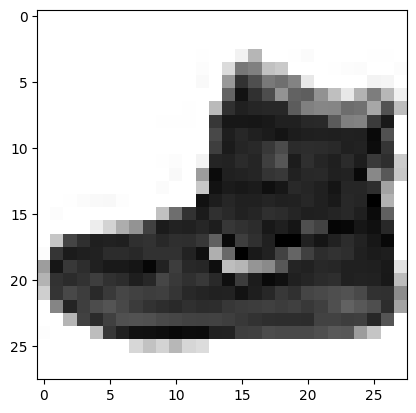

In [59]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [60]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [61]:
print(feature_maps.shape)

(1, 28, 28, 32)


첫번째 신경곱 층을 통과한 데이터는 (28, 28, 32)를 가진다.

첫번째 차원은 배치차원이며 1개의 샘플을 넣었기 때문에 1이 된다.

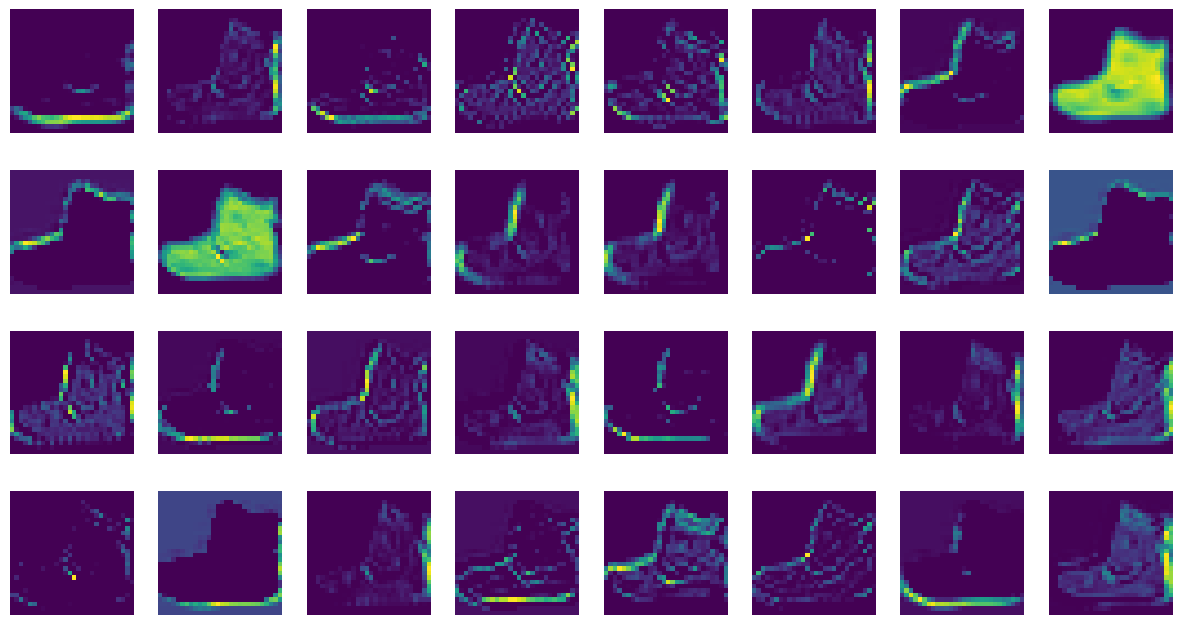

In [62]:
fig ,axs = plt.subplots(4, 8 , figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i,j].axis('off')

plt.show()

이 특성맵은 32개의 필터로 인해 이미지에서 강하게 활성화된 부분을 보여준다.

In [63]:
conv2_acti = keras.Model(model.layers[0].input, model.layers[2].output)

In [65]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


In [66]:
print(feature_maps.shape)

(1, 14, 14, 64)


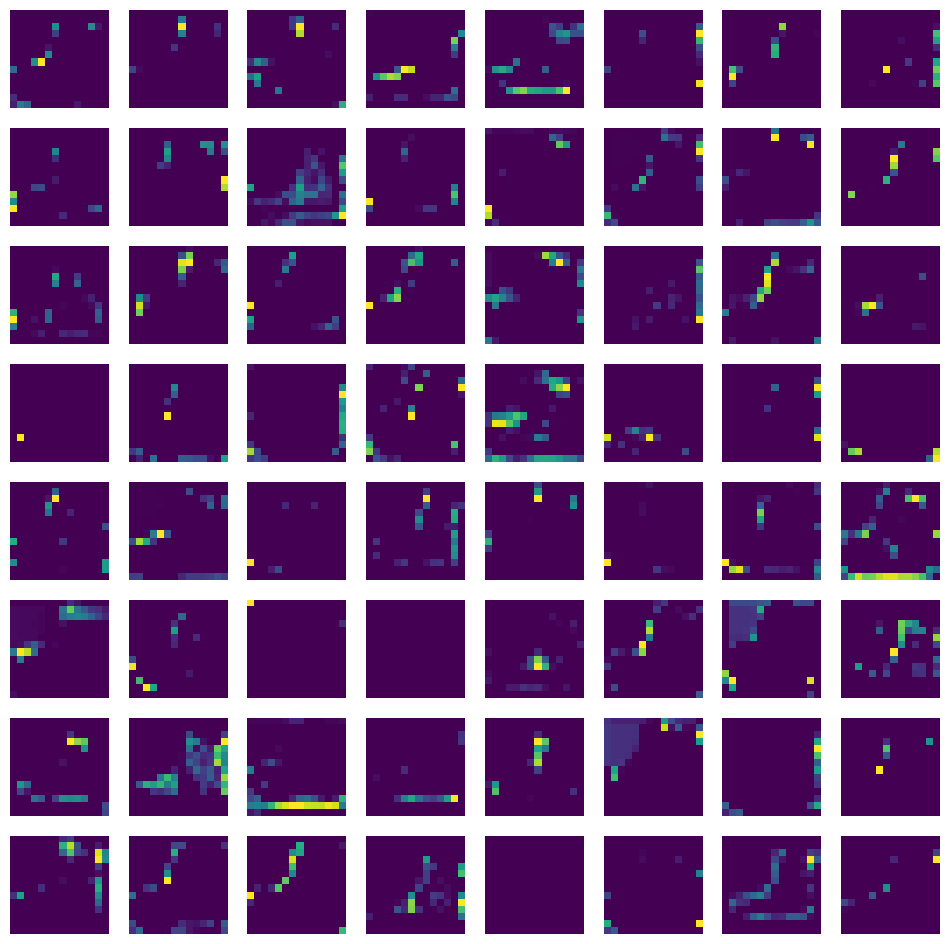

In [67]:
fig ,axs = plt.subplots(8, 8 , figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i,j].axis('off')

plt.show()

이 특성맵은 시각적으로 이해하기 어려운데 그 이유는 다음과 같다.

두 번째 합성곱 층의 **필터**의 크기는 (3,3,32)이다. 두 번째 합성곱 층의 첫 번째 필터가 앞서 출력한 32개의 특성 맵과 곱해져 두 번째 합성곱 층의 첫 번째 특성 맵이 된다. 따라서 이렇게 계산된 출력은 (14, 14 ,32) 특성 맵에서 어떤 부위를 감지하는지 직관적으로 이해하기 어렵다.